In [2]:
pip install bm3d

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import bm3d
import cv2
import pywt
import os
from skimage import io, img_as_float
from PIL import Image

In [4]:
#create folder for output images
if not os.path.isdir("Output_images"):
    os.makedirs("Output_images")

In [6]:
#task1.1: Read/load the given image file in rgb and greyscale mode
img_file = 'image_Lena512rgb_noi_s25.png'
img = cv2.imread(img_file, cv2.IMREAD_COLOR)
gray_img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
#task1.2: Save greyscale image
cv2.imwrite('Output_images/grayscale.png',gray_img)

True

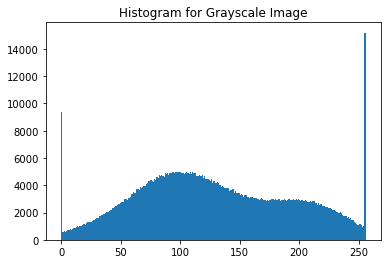

In [9]:
#task1.3: Plot grayscale histogram 
dst = cv2.calcHist(gray_img, [0], None, [256], [0,256])
plt.hist(img.ravel(),256,[0,256])
plt.title('Histogram for Grayscale Image')
plt.savefig('Output_images/hist.png')

In [10]:
#task1.4: Denoise the image using NLMean algorithm and save the image
denoise = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
cv2.imwrite('Output_images/denoise_nlmean.png',denoise)

True

In [11]:
#task1.5: Denoise the image using BM3D algorithm and save the image
img_file = 'image_Lena512rgb_noi_s25.png'
img = img_as_float(io.imread(img_file))
denoised_image = bm3d.bm3d(img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
plt.imsave("Output_images/denoise_bm3d.png", denoised_image)

In [12]:
#task1.6: Apply HAAR Decomposition on the greyscale image and save all the output images
(cA, (cH, cV, cD)) = pywt.dwt2(gray_img, 'haar')
cv2.imwrite('Output_images/Approximation.png',cA)
cv2.imwrite('Output_images/Horizontal.png',cH)
cv2.imwrite('Output_images/Vertical.png',cV)
cv2.imwrite('Output_images/diagonal.png',cD)

True